Этот набор данных содержит подробные данные о продажах шоколада, включая сведения о продукте, объемах продаж, выручке и сегментах клиентов. Он предназначен для прогнозирования продаж, анализа тенденций и бизнес-аналитики, помогая компаниям оптимизировать ценовые стратегии, управлять запасами и ориентироваться на клиентов.

In [98]:
import pandas as pd
#Считываем csv файл
df = pd.read_csv("Chocolate Sales.csv")
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [99]:
#форматы
print(df.dtypes)

Sales Person     object
Country          object
Product          object
Date             object
Amount           object
Boxes Shipped     int64
dtype: object


Переведем столбец Date в формат datetime и привычный формат YYYY-MM-DD

In [100]:
# Преобразование столбца в формат datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Преобразование в строковый формат 
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

# Вывод результата
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,"$13,685",184


Добавил столбец Cost_per_Box с ценой за одну коробку шоколада

In [101]:
# Удаляем символ доллара и преобразуем Amount в числовой формат 
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)

# Добавляем столбец с стоимостью одной коробки
df['Cost_per_Box'] = df['Amount'] / df['Boxes Shipped']
df['Cost_per_Box'] = df['Cost_per_Box'].round(1)

# Вывод результата
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Cost_per_Box
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,29.6
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,84.0
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,49.5
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,37.2
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,74.4


Найдем кто купил больше всего коробок шоколада

In [103]:
# Находим строки с максимальным Amount для каждой страны
max_spenders = df.loc[df.groupby('Country')['Amount'].idxmax()]

# Вывод результата
print(max_spenders[['Sales Person', 'Country', 'Amount']])

            Sales Person      Country   Amount
66           Van Tuxwell    Australia  19453.0
57           Brien Boise       Canada  16793.0
543         Ches Bonnell        India  22050.0
751  Rafaelita Blaksland  New Zealand  19481.0
212       Marney O'Breen           UK  18991.0
949  Dennison Crosswaite          USA  17465.0


Найдем человека который купил самое больше количество коробок за весь период 

In [104]:
# Находим индекс строки с максимальным значением в столбце "Boxes Shipped"
max_boxes_index = df['Boxes Shipped'].idxmax()

# Извлекаем строку с максимальным значением
max_boxes_row = df.loc[max_boxes_index]

# Вывод результата
print(max_boxes_row)

Sales Person       Van Tuxwell
Country                 Canada
Product          Drinking Coco
Date                2022-06-15
Amount                  4900.0
Boxes Shipped              709
Cost_per_Box               6.9
Name: 1028, dtype: object


 Анализ продаж по странам (какая страна приносит наибольший доход)

In [105]:
sales_by_country = df.groupby('Country')['Amount'].sum().reset_index()
sales_by_country_sorted = sales_by_country.sort_values(by='Amount', ascending=False)
print(sales_by_country_sorted)

       Country     Amount
0    Australia  1137367.0
4           UK  1051792.0
2        India  1045800.0
5          USA  1035349.0
1       Canada   962899.0
3  New Zealand   950418.0


Анализ популярности продуктов (топ 5 шоколада который продается лучше всего (по сумме продаж))

In [106]:
product_sales = df.groupby('Product').agg({'Boxes Shipped': 'sum', 'Amount': 'sum'}).reset_index()
product_sales_sorted = product_sales.sort_values(by='Amount', ascending=False)

print(product_sales_sorted[:5])

                Product  Boxes Shipped    Amount
19   Smooth Sliky Salty           8810  349692.0
0        50% Dark Bites           9792  341712.0
21           White Choc           8240  329147.0
17  Peanut Butter Cubes           8304  324842.0
10              Eclairs           8757  312445.0


Диаграмма продаж по странам.

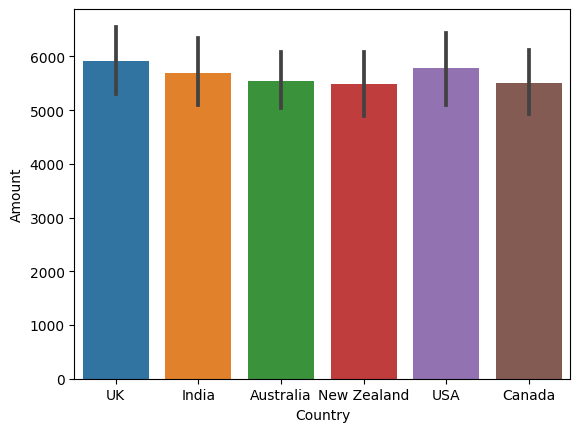

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Country', y='Amount', data=df)
plt.show()